<a href="https://colab.research.google.com/github/MaitreePimple/Data-Science/blob/main/OnlineRetailDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming "Task3" is a CSV file. Change the file extension and function accordingly if it's a different type.
df = pd.read_excel("/content/Task3.xlsx")

In [5]:
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# Drop rows with missing CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

# Fill missing values in 'Description' with a placeholder
df['Description'].fillna('No description', inplace=True)


In [7]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)


In [8]:
# Convert 'InvoiceDate' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert 'CustomerID' to integer
df['CustomerID'] = df['CustomerID'].astype(int)


In [9]:
# Using IQR to filter out outliers for 'Quantity' and 'UnitPrice'
Q1_quantity = df['Quantity'].quantile(0.25)
Q3_quantity = df['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

Q1_price = df['UnitPrice'].quantile(0.25)
Q3_price = df['UnitPrice'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Filter out outliers
df = df[~((df['Quantity'] < (Q1_quantity - 1.5 * IQR_quantity)) | (df['Quantity'] > (Q3_quantity + 1.5 * IQR_quantity)))]
df = df[~((df['UnitPrice'] < (Q1_price - 1.5 * IQR_price)) | (df['UnitPrice'] > (Q3_price + 1.5 * IQR_price)))]


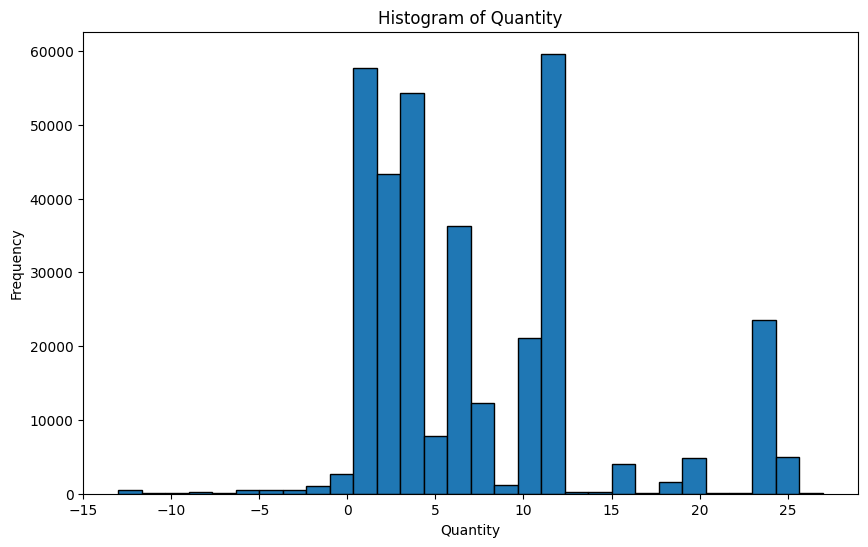

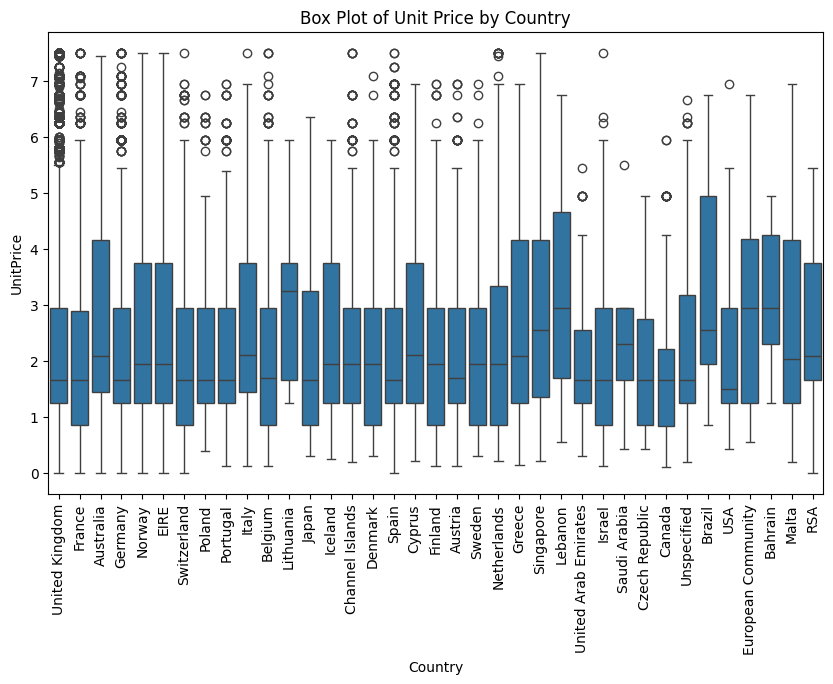

In [13]:
# Histogram of Quantity
plt.figure(figsize=(10, 6))
plt.hist(df['Quantity'], bins=30, edgecolor='k')
plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Box Plot of Unit Price by Country
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='UnitPrice', data=df)
plt.xticks(rotation=90)
plt.title('Box Plot of Unit Price by Country')
plt.show()


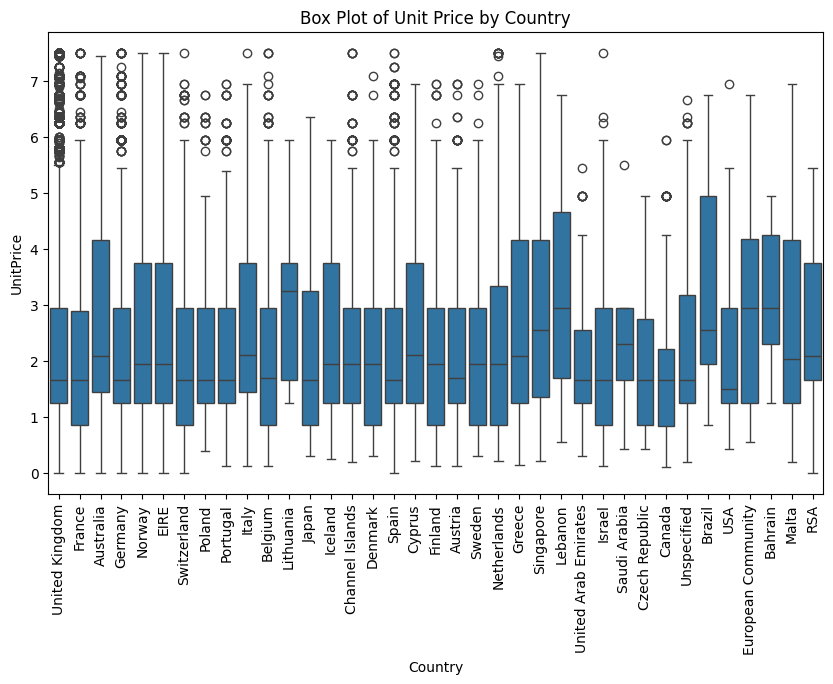

In [14]:
df.to_csv('cleaned_data.csv', index=False)

# Save a plot to a file
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='UnitPrice', data=df)
plt.xticks(rotation=90)
plt.title('Box Plot of Unit Price by Country')
plt.savefig('box_plot.png')
plt.show()

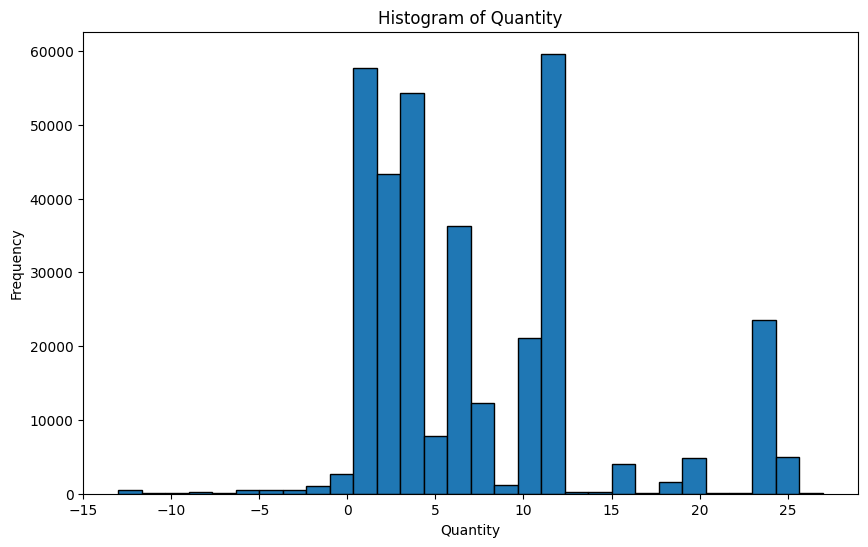

In [15]:
df.to_csv('cleaned_data.csv', index=False)

# Save a plot to a file
plt.figure(figsize=(10, 6))
plt.hist(df['Quantity'], bins=30, edgecolor='k')
plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()